# Analyzing data with Pandas

This lesson assumes some programming background, but not necessarily with Python. Our focus is less on the details of the Python language and more on what tools like `pandas` and `matplotlib` allow us to do with tabular data. However, if you're new to Python, this notebook will give you some familiarity with general Python behavior.

We will learn how to do the following:

* Reading and manipulating tabular data with `pandas`
* Visualization and plotting data with `matplotlib`

and possibly as a bonus:

* Simple linear regression modeling of data with `scikit-learn`


This lesson is based on the [Software Carpentry](http://software-carpentry.org/) [``python-intermediate-mosquitoes``](https://github.com/swcarpentry/python-intermediate-mosquitoes) lesson, and uses its datasets.

## Getting started

We are interested in understanding the relationship between the weather and the number of mosquitos occuring in a particular year so that we can plan mosquito control measures accordingly. Since we want to apply these mosquito control measures at a number of different sites we need to understand both the relationship at a particular site and whether or not it is consistent across sites. The data we have to address this problem comes from the local government and are stored in tables in comma-separated values (CSV) files. Each file holds the data for a single location, each row holds the information for a single year at that location, and the columns hold the data on both mosquito numbers and the average temperature and rainfall from the beginning of mosquito breeding season. The first few rows of our first file look like:

In [1]:
%cat A1_mosquito_data.csv | head -n 5

year,temperature,rainfall,mosquitos
2001,80,157,150
2002,85,252,217
2003,86,154,153
2004,87,159,158


And we have five files to work with:

In [2]:
%ls *.csv

A1_mosquito_data.csv  A3_mosquito_data.csv  B2_mosquito_data.csv
A2_mosquito_data.csv  B1_mosquito_data.csv


**Note**: commands preceded with a `%` are known as "magics". These are specfic to the notebook environment. They are *not* Python commands.

Since this is tabular data, our tool of choice is [``pandas``](http://pandas.pydata.org/), a library that provides special data structures for doing fast numerical operations on tabular data. Internally, ``pandas`` uses [``numpy``](http://www.numpy.org/) to do the heavy lifting.

In [3]:
import pandas as pd

Importing a library in this way allows us to use the components defined inside of it. First, we'll read in a single dataset using the ``pandas.read_csv`` function:

In [4]:
pd.read_csv('A1_mosquito_data.csv')

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


This reads the CSV from disk and deserializes it into a [``pandas.DataFrame``](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). But unless we attach a name to the `DataFrame` the function returns, we cannot keep working with the object in memory. We'll attach the name `data` to this `DataFrame`:

In [5]:
data = pd.read_csv('A1_mosquito_data.csv')

In [6]:
data

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


Now we can refer to the `DataFrame` directly, without having to read it from disk every time. A `DataFrame` is an **object**. We can see what type of object it is with the Python builtin, ``type``:

In [7]:
type(data)

pandas.core.frame.DataFrame

It turns out that in Python, **everything** is an object. We'll see what this means as we go, but the most important aspect of this is that in Python we have **names**, and we assign these to **objects**. Any name can point to any object, and more than one name can point to a single object.

Anyway, a ``DataFrame`` allows us to get at individual components of our tabular data. We can get single columns like:

In [8]:
data['year']

0    2001
1    2002
2    2003
3    2004
4    2005
5    2006
6    2007
7    2008
8    2009
9    2010
Name: year, dtype: int64

Or multiple columns with:

In [9]:
data[['rainfall', 'temperature']]

,rainfall,temperature
0,157,80
1,252,85
2,154,86
3,159,87
4,292,74
5,283,75
6,214,80
7,197,85
8,231,74
9,207,74


Slicing can be used to get back subsets of rows:

In [10]:
data[0:2]

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217


Python indices are 0-based, meaning counting goes as 0, 1, 2, 3...; this means that the first row is row 0, the second row is row 1, etc. It's best to refer to row 0 as the "zeroth row" to avoid confusion.

This slice should be read as "get the 0th element up to and not including the 2nd element". The "not including" is important, and the cause of much initial frustration. It does take some getting used to.

What if we want a single row?

In [11]:
data[1]

KeyError: 1

For a DataFrame, this is ambiguous, since a single value is interpreted as a column name. We can only get at rows by slicing at the top level:

In [12]:
data[1:2]

,year,temperature,rainfall,mosquitos
1,2002,85,252,217


Or we could use `.iloc`:

In [13]:
data.iloc[1]

year           2002
temperature      85
rainfall        252
mosquitos       217
Name: 1, dtype: int64

Getting a single row in this way returns a `Series`:

In [14]:
type(data.iloc[1])

pandas.core.series.Series

A `Series` is a 1-D column of values, having all the same datatype. Since each of the datatypes of our columns were integers, we got a `Series` with dtype `int64` this time. If we had columns with, e.g. strings, then we'd get back dtype `object`, which is a catchall for ``pandas``.

We can also get the data in our ``Series`` as a raw ``numpy`` array:

In [15]:
type(data.iloc[1].values)

numpy.ndarray

Pandas is a relatively young library (started seeing widening use around 2011), but it's built on top of the venerable ``numpy`` array, which makes it possible to do fast numerical work in Python. A `Series` is basically a 1-D ``numpy`` array with the ability to select by labeled indices:

## Subsetting data

More usefully than simple slicing, we can use boolean indexing to subselect our data. Say we want only data for years beyond 2005?

In [16]:
data[data['year'] > 2005]

,year,temperature,rainfall,mosquitos
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


There's no magic here; we get a boolean index directly from a comparison:

In [17]:
gt_2005 = data['year'] > 2005
gt_2005

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
9     True
Name: year, dtype: bool

And using this `Series` of bools will then give only the rows for which the `Series` had `True`:

In [18]:
data[gt_2005]

,year,temperature,rainfall,mosquitos
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


This is the same behavior as ``numpy`` arrays: using most binary operators, such as ``+``, ``*``, ``>``, ``&``, work element-wise. With a single value on one side (such as ``2005``), we get the result of the operation for each element.

A ``DataFrame`` is an *object*, and objects have **methods**. These are functions that are *part of* the object itself, often doing operations on the object's data. One of these is ``DataFrame.mean``:

In [19]:
data.mean()

year           2005.5
temperature      80.0
rainfall        214.6
mosquitos       191.3
dtype: float64

We get back the mean value of each column as a single ``Series``. There's more like this:

In [20]:
data.max()

year           2010
temperature      87
rainfall        292
mosquitos       243
dtype: int64

There's also ``DataFrame.describe``, which gives common descriptive statistics of the whole `DataFrame`:

In [21]:
data.describe()

,year,temperature,rainfall,mosquitos
count,10.00000,10.000000,10.000000,10.00000
mean,2005.50000,80.000000,214.600000,191.30000
std,3.02765,5.456902,50.317216,33.23335
min,2001.00000,74.000000,154.000000,150.00000
25%,2003.25000,74.250000,168.500000,163.75000
50%,2005.50000,80.000000,210.500000,187.00000
75%,2007.75000,85.000000,246.750000,212.75000
max,2010.00000,87.000000,292.000000,243.00000


This is, itself, a ``DataFrame``:

In [22]:
data.describe()['temperature']

count    10.000000
mean     80.000000
std       5.456902
min      74.000000
25%      74.250000
50%      80.000000
75%      85.000000
max      87.000000
Name: temperature, dtype: float64

Documentation is a key part of Python's design. In the notebook, you can get a quick look at the docs for a given Python function or method with:

In [23]:
data.describe?

Or more generally (built-in Python behavior):

In [24]:
help(data.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generate various summary statistics, excluding NaN values.
    
    Parameters
    ----------
    percentiles : array-like, optional
        The percentiles to include in the output. Should all
        be in the interval [0, 1]. By default `percentiles` is
        [.25, .5, .75], returning the 25th, 50th, and 75th percentiles.
    include, exclude : list-like, 'all', or None (default)
        Specify the form of the returned result. Either:
    
        - None to both (default). The result will include only
          numeric-typed columns or, if none are, only categorical columns.
        - A list of dtypes or strings to be included/excluded.
          To select all numeric types use numpy numpy.number. To select
          categorical objects use type object. See also the select_dtypes
          documentation. eg. df.describe(

--------------
### Challenge: obtain the standard deviation of mosquito count for years in which the rainfall was greater than 200:

One way we could do this is to first grab the ``"mosquitos"`` column, then use a fancy index obtained from comparing the ``"rainfall"`` column to ``200``. We can then call the ``std`` method of the resulting ``Series``:

In [25]:
data['mosquitos'][data['rainfall'] > 200].std()

24.587937421969063

Note that this is a key part of the power of ``pandas`` objects: operations for subsetting and calculating descriptive statistics can often be stacked to great effect.

-----------------------

What if we know our temperatures are in fahrenheit, but we want them in celsius? We can convert them.

In [26]:
(data['temperature'] - 32) * 5 / 9

0    26.666667
1    29.444444
2    30.000000
3    30.555556
4    23.333333
5    23.888889
6    26.666667
7    29.444444
8    23.333333
9    23.333333
Name: temperature, dtype: float64

This gives us back a new ``Series`` object. If we want to change the values in our existing ``DataFrame`` to be these, we can just set the column to this new ``Series``:

In [27]:
data['temperature'] = (data['temperature'] - 32) * 5 / 9

In [28]:
data['temperature']

0    26.666667
1    29.444444
2    30.000000
3    30.555556
4    23.333333
5    23.888889
6    26.666667
7    29.444444
8    23.333333
9    23.333333
Name: temperature, dtype: float64

Similarly, it's also possible to add new columns. We could add one giving us, e.g. the ratio of rainfall to mosquitos:

In [29]:
data['rainfall / mosquitos'] = data['rainfall'] / data['mosquitos']

In [30]:
data

,year,temperature,rainfall,mosquitos,rainfall / mosquitos
0,2001,26.666667,157,150,1.046667
1,2002,29.444444,252,217,1.161290
2,2003,30.000000,154,153,1.006536
3,2004,30.555556,159,158,1.006329
4,2005,23.333333,292,243,1.201646
5,2006,23.888889,283,237,1.194093
6,2007,26.666667,214,190,1.126316
7,2008,29.444444,197,181,1.088398
8,2009,23.333333,231,200,1.155000
9,2010,23.333333,207,184,1.125000


It's probably a bit silly to have such a column. So, let's get rid of it:

In [31]:
del data['rainfall / mosquitos']

In [32]:
data

,year,temperature,rainfall,mosquitos
0,2001,26.666667,157,150
1,2002,29.444444,252,217
2,2003,30.000000,154,153
3,2004,30.555556,159,158
4,2005,23.333333,292,243
5,2006,23.888889,283,237
6,2007,26.666667,214,190
7,2008,29.444444,197,181
8,2009,23.333333,231,200
9,2010,23.333333,207,184


Don't like the order of your columns? We can make a ``DataFrame`` with a different column order by selecting them out in the order we want:

In [33]:
data[['rainfall', 'year', 'mosquitos', 'temperature']]

,rainfall,year,mosquitos,temperature
0,157,2001,150,26.666667
1,252,2002,217,29.444444
2,154,2003,153,30.000000
3,159,2004,158,30.555556
4,292,2005,243,23.333333
5,283,2006,237,23.888889
6,214,2007,190,26.666667
7,197,2008,181,29.444444
8,231,2009,200,23.333333
9,207,2010,184,23.333333


We can even have duplicates:

In [34]:
data[['rainfall', 'year', 'mosquitos', 'temperature', 'year']]

,rainfall,year,mosquitos,temperature,year
0,157,2001,150,26.666667,2001
1,252,2002,217,29.444444,2002
2,154,2003,153,30.000000,2003
3,159,2004,158,30.555556,2004
4,292,2005,243,23.333333,2005
5,283,2006,237,23.888889,2006
6,214,2007,190,26.666667,2007
7,197,2008,181,29.444444,2008
8,231,2009,200,23.333333,2009
9,207,2010,184,23.333333,2010


Remember: this returns a copy. It does not change our existing ``DataFrame``:

In [35]:
data

,year,temperature,rainfall,mosquitos
0,2001,26.666667,157,150
1,2002,29.444444,252,217
2,2003,30.000000,154,153
3,2004,30.555556,159,158
4,2005,23.333333,292,243
5,2006,23.888889,283,237
6,2007,26.666667,214,190
7,2008,29.444444,197,181
8,2009,23.333333,231,200
9,2010,23.333333,207,184


## Plotting data from a DataFrame

Just as ``pandas`` is the de-facto library for working with tabular data, ``matplotlib`` is the de-facto library for producing high-quality plots from numerical data. A saying often goes that matplotlib makes easy things easy and hard things possible when it comes to making plots.

In [36]:
import matplotlib.pyplot as plt

We need to tell the notebook to render plots in the notebook itself:

In [37]:
%matplotlib inline

Before we use ``matplotlib`` explicitly, ``pandas`` objects feature convenience methods for common plotting operations. These use ``matplotlib`` internally, so everything we learn later about ``matplotlib`` objects applies to these. For example, we can plot both ``"temperature"`` and ``"mosquitos"`` as a function of ``"year"``:

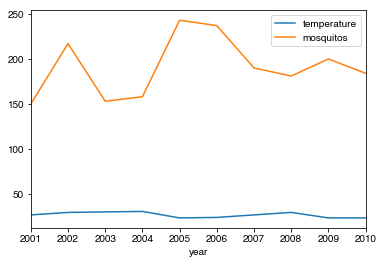

In [38]:
data.plot(x='year', y=['temperature', 'mosquitos'])

Let's load a larger dataset:

In [39]:
data = pd.read_csv('A2_mosquito_data.csv')

This dataset has 51 rows, instead of just 10:

In [40]:
len(data)

51

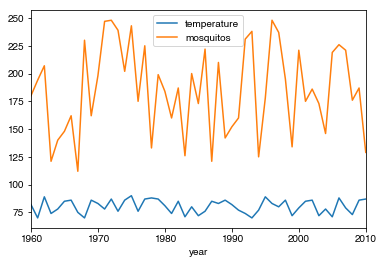

In [41]:
data.plot(x='year', y=['temperature', 'mosquitos'])

There are [other convenience methods](http://pandas.pydata.org/pandas-docs/stable/visualization.html) for different ways of plotting the data. For example, we can get a kernel-density estimate:

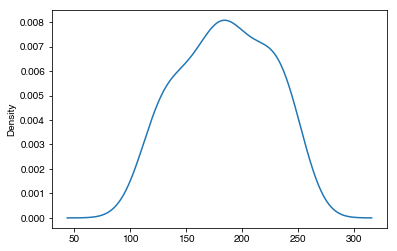

In [42]:
data['mosquitos'].plot.kde()

These convenience methods are great, but for more complex plots we can, and should, use ``matplotlib`` directly. We can make a multi-paneled figure giving both "temperature" and "rainfall" for each "year."

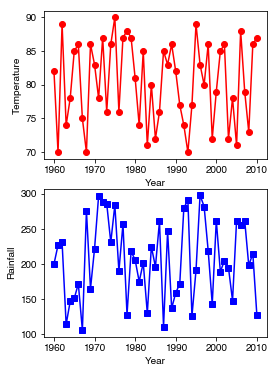

In [43]:
fig = plt.figure(figsize=(4, 6))

ax1 = fig.add_subplot(2, 1, 1)

ax1.plot(data['year'], data['temperature'], 'ro-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature')

ax2 = fig.add_subplot(2, 1, 2)

ax2.plot(data['year'], data['rainfall'], 'bs-')

ax2.set_xlabel('Year')
ax2.set_ylabel('Rainfall')

----------
### Challenge: plot the relationship between the number of mosquitos and temperature and the number of mosquitos and rainfall.

We can do this in a similar way as we did above.

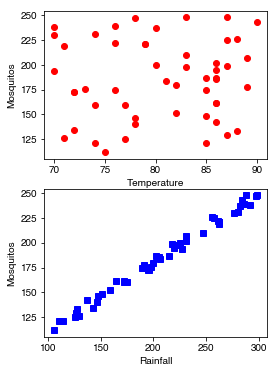

In [44]:
fig = plt.figure(figsize=(4, 6))

ax1 = fig.add_subplot(2, 1, 1)

ax1.plot(data['temperature'], data['mosquitos'], 'ro')

ax1.set_xlabel('Temperature')
ax1.set_ylabel('Mosquitos')

ax2 = fig.add_subplot(2, 1, 2)

ax2.plot(data['rainfall'], data['mosquitos'], 'bs')

ax2.set_xlabel('Rainfall')
ax2.set_ylabel('Mosquitos')

Note that the *linestyle* code on the right can be used to turn off interpolation lines, since we want to just plot the points, and don't care about their order.

-------------

From this one dataset we see what looks like a linear relationship between mosquitos and rainfall, but not really any relationship between mosquitos and temperature. We'd like to quantify this further by applying a statistical model to the data, but we also want to do this same treatment to **all** our datasets.

## Gathering up all the data into a single `DataFrame`

Although we could at this point create a separate `DataFrame` for each area (CSV file) we have data for, `pandas` is generally more useful when we can pack as much of our data as is reasonable into a single DataFrame. Since all our datasets have the same form, we can probably gain by combining them.

 First, we'll import a module called ``glob``:

In [45]:
import glob

We can use this to grab all the filenames matching a "globbing" pattern:

In [46]:
glob.glob("*.csv")

['A3_mosquito_data.csv',
 'A1_mosquito_data.csv',
 'A2_mosquito_data.csv',
 'B1_mosquito_data.csv',
 'B2_mosquito_data.csv']

"Globbing" is the name of the shell-completion patterns common for shells like ``sh`` and ``bash``.

We will use the ``pandas.concat`` function to make a single ``DataFrame`` from all our others:

In [47]:
filenames = sorted(glob.glob('*.csv'))
dfs = []
keys = []
for filename in filenames:
    keys.append(filename.split('_')[0])
    dfs.append(pd.read_csv(filename))
    
df = pd.concat(dfs, keys=keys, names=['location'])

We now have a "multi-index" ``DataFrame``:

In [48]:
df

year  temperature  rainfall  mosquitos
location                                           
A1       0   2001           80       157        150
         1   2002           85       252        217
         2   2003           86       154        153
         3   2004           87       159        158
         4   2005           74       292        243
         5   2006           75       283        237
         6   2007           80       214        190
         7   2008           85       197        181
         8   2009           74       231        200
         9   2010           74       207        184
A2       0   1960           82       200        180
         1   1961           70       227        194
         2   1962           89       231        207
         3   1963           74       114        121
         4   1964           78       147        140
         5   1965           85       151        148
         6   1966           86       172        162
         7   1967           75       106        112
         8   1968           70       276        230
         9   1969           86       165        162
         10  1970           83       222        198
         11  1971           78       297        247
         12  1972           87       288        248
         13  1973           76       286        239
         14  1974           86       231        202
         15  1975           90       284        243
         16  1976           76       190        175
         17  1977           87       257        225
         18  1978           88       128        133
         19  1979           87       218        199
...           ...          ...       ...        ...
B2       21  1981           82       121        141
         22  1982           78       234        223
         23  1983           90       281        263
         24  1984           76       151        159
         25  1985           78       152        164
         26  1986           72       262        236
         27  1987           77       258        240
         28  1988           80       263        244
         29  1989           85       191        194
         30  1990           84       166        177
         31  1991           79       205        200
         32  1992           78       154        167
         33  1993           84       278        253
         34  1994           71       224        207
         35  1995           71       281        246
         36  1996           76       187        188
         37  1997           81       123        143
         38  1998           73       260        235
         39  1999           70       278        244
         40  2000           80       262        243
         41  2001           71       155        162
         42  2002           77       241        227
         43  2003           75       132        145
         44  2004           78       184        183
         45  2005           87       266        247
         46  2006           79       201        199
         47  2007           85       227        220
         48  2008           74       206        200
         49  2009           77       260        240
         50  2010           89       242        236

[214 rows x 4 columns]

The outer index gives the area name ("location") the rows came from. These allow us to select rows on the basis of area:

In [49]:
df.loc[('A1', 1)]

year           2002
temperature      85
rainfall        252
mosquitos       217
Name: (A1, 1), dtype: int64

More powerfully, this allows us to get aggregates over all areas:

In [50]:
df[df['year'] > 2005]['temperature'].mean()

81.040000000000006

Or get descriptive statistics directly as a function of location:

In [51]:
df.mean(level='location')

,year,temperature,rainfall,mosquitos
location,,,,
A1,2005.5,80.000000,214.600000,191.300000
A2,1985.0,80.392157,207.039216,185.235294
A3,1985.0,80.333333,193.274510,97.647059
B1,1985.0,79.627451,204.588235,99.509804
B2,1985.0,79.764706,196.823529,196.058824


-------------
### Challenge: obtain the minimum rainfall for each location given that the  temperature was between 75F and 90F.

This is best read backwards. First, let's filter our rows so we only get those for the temperature range we want:

In [52]:
df[(df['temperature'] > 75) & (df['temperature'] < 90)]

year  temperature  rainfall  mosquitos
location                                           
A1       0   2001           80       157        150
         1   2002           85       252        217
         2   2003           86       154        153
         3   2004           87       159        158
         6   2007           80       214        190
         7   2008           85       197        181
A2       0   1960           82       200        180
         2   1962           89       231        207
         4   1964           78       147        140
         5   1965           85       151        148
         6   1966           86       172        162
         9   1969           86       165        162
         10  1970           83       222        198
         11  1971           78       297        247
         12  1972           87       288        248
         13  1973           76       286        239
         14  1974           86       231        202
         16  1976           76       190        175
         17  1977           87       257        225
         18  1978           88       128        133
         19  1979           87       218        199
         20  1980           81       206        184
         22  1982           85       202        187
         24  1984           80       225        200
         26  1986           76       261        222
         27  1987           85       111        121
         28  1988           83       247        210
         29  1989           86       137        142
         30  1990           82       159        152
         31  1991           77       172        160
...           ...          ...       ...        ...
B2       10  1970           85       227        216
         11  1971           81       197        197
         13  1973           89       100        136
         14  1974           84       294        268
         15  1975           82       134        156
         16  1976           77       116        139
         17  1977           84       157        175
         18  1978           85       128        154
         19  1979           79       119        143
         21  1981           82       121        141
         22  1982           78       234        223
         24  1984           76       151        159
         25  1985           78       152        164
         27  1987           77       258        240
         28  1988           80       263        244
         29  1989           85       191        194
         30  1990           84       166        177
         31  1991           79       205        200
         32  1992           78       154        167
         33  1993           84       278        253
         36  1996           76       187        188
         37  1997           81       123        143
         40  2000           80       262        243
         42  2002           77       241        227
         44  2004           78       184        183
         45  2005           87       266        247
         46  2006           79       201        199
         47  2007           85       227        220
         49  2009           77       260        240
         50  2010           89       242        236

[151 rows x 4 columns]

Then, we can grab the minimum rainfall for these:

In [53]:
df[(df['temperature'] > 75) & (df['temperature'] < 90)]['rainfall'].min()

100

But we wanted minimum rainfall **for each location**; we can tell ``Series.min`` to split the data by location:

In [54]:
df[(df['temperature'] > 75) & (df['temperature'] < 90)]['rainfall'].min(level='location')

location
A1    154
A2    111
A3    112
B1    102
B2    100
Name: rainfall, dtype: int64

--------------

We can do even more powerful splitting of our `DataFrame` into subsets of interest using `groupby`.

## Split-apply-combine using `groupby`

A ``groupby`` allows us to split our rows according to values in one or more column. For example, we could ask for the minimum rainfall measured across all areas for each year:

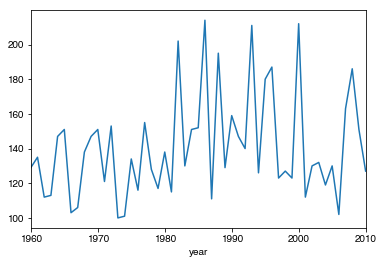

In [55]:
df.groupby('year')['rainfall'].min().plot()

This should be read as "group the data by year, then get the minimum rainfall for each group; plot the resulting series." If we want to do something more complex for each group of rows, we can use a ``for`` loop:

In [58]:
from seaborn.apionly import color_palette

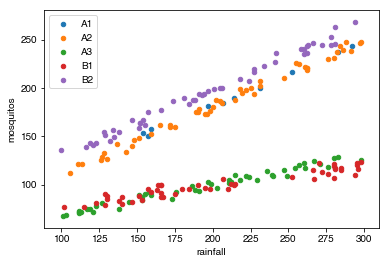

In [59]:
ax = plt.figure().add_subplot(1,1,1)

for i, (name, group) in enumerate(df.groupby(level='location')):
    group.plot.scatter(x='rainfall', y='mosquitos', 
                       label=name, legend=True, ax=ax, color=color_palette()[i])

To learn more about ``groupby``s, check out the ``pandas`` docs on the "split-apply-combine" approach to working with datasets with ``groupby``: http://pandas.pydata.org/pandas-docs/stable/groupby.html

## Final bit of fun with `scikit-learn`

Since it looks like we have a linear relationship between mosquitos and rainfall in each area, we could fit a linear regression estimator to the data for each area and further quantify the relationship. For simplicity we'll just use rainfall instead of both temperature and rainfall in building our model.

Doing this for just the area `'A2'`:

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression().fit(df.loc['A2'][['rainfall']], df.loc['A2']['mosquitos'])

We can extract out the coefficient(s) from the fit (there's only one since we only have one feature, rainfall):

In [63]:
lr.coef_

array([ 0.69588497])

as well as the intercept:

In [62]:
lr.intercept_

41.159816368684659

And we could use these to plot the model against the original data:

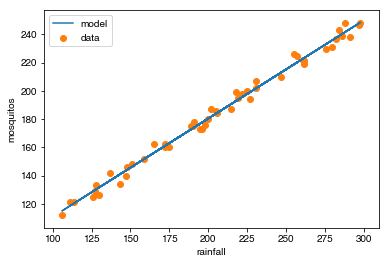

In [64]:
# plot the model results
plt.plot(df.loc['A2']['rainfall'],
            lr.coef_[0] * df.loc['A2']['rainfall'] + lr.intercept_,
            label='model')

# plot the original data
plt.scatter(df.loc['A2']['rainfall'], df.loc['A2']['mosquitos'],
            label='data',
            color=color_palette()[1])

plt.xlabel('rainfall')
plt.ylabel('mosquitos')
plt.legend(loc='best')

We can see that this fit does a pretty good job of modeling the data. We can get back the $R^2$ of the fit with:

In [65]:
lr.score(df.loc['A2'][['rainfall']], df.loc['A2']['mosquitos'])

0.99131593546068497

We could also do this for each of our areas, using `groupby`:

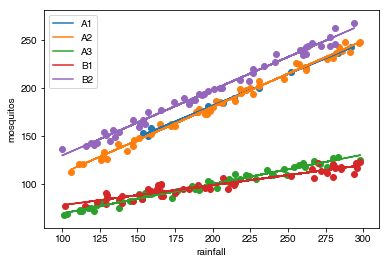

In [66]:
for i, (name, group) in enumerate(df.groupby(level='location')):
    
    # fit the model 
    lr = LinearRegression().fit(group[['rainfall']], group['mosquitos'])

    # plot the model result
    plt.plot(group['rainfall'],
            lr.coef_[0] * group['rainfall'] + lr.intercept_,
            label=name,
            color=color_palette()[i])

    # plot the original data for this area
    plt.scatter(group['rainfall'], group['mosquitos'],
                color=color_palette()[i], label=None)

plt.xlabel('rainfall')
plt.ylabel('mosquitos')
plt.legend(loc='best')

## In summary

There's plenty more that `pandas` can do, including joining `DataFrame`s on common keys, aggregating timeseries on regular intervals like like hours or days, generating pivot tables, and many ways to read and write tabular data. Check out the extensive [pandas docs](http://pandas.pydata.org/pandas-docs/stable/) for more details.